<a href="https://colab.research.google.com/github/shashankmutyala/ECG-to-SCG-signals-/blob/main/ECG_to_SCG_using_Wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.15.0


In [ ]:
from tensorflow.keras.layers import LayerNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14778446295508401267
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11037069541825189805
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-y4bspgbo
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-y4bspgbo
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=88f1f57fa7688123812aca016dea3439ded515fb7ecbdd413ac742a88c63e314
  Stored in directory: /tmp/pip-ephem-wheel-cache-i76r51ng/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [ ]:
!pip install --upgrade keras
!pip install --upgrade tensorflow
!pip install -U tensorflow
!python -m pip show tensorflow
!pip install --upgrade tensorflow
!python -m pip show tensorflow
!pip install tensorflow-addons
!pip install -q tensorflow-addons
!pip install --upgrade tensorflow
!pip install utils

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR:

In [ ]:
!pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install padasip

  Preparing metadata (setup.py) ... done
  Created wheel for padasip: filename=padasip-1.2.2-py3-none-any.whl size=51650 sha256=b86dad9a0dc2785f32ef154d26717ff36c68e088c7d454b2ee3d25e81d176e40
  Stored in directory: /root/.cache/pip/wheels/a0/bb/e7/b57f417dbad7d85dbcb177f2c185543ca34a1b36541f115e95
Successfully built padasip


In [ ]:
fileNames = []
fileName_str = []

for i in range(10,11,1):
  name_str = ''
  if(i<10):
    name_str = 'b00'
  else:
    name_str = 'b0'
  fileNames.append(name_str+ str(i)+'.edf')
  fileName_str.append(name_str+ str(i))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

In [ ]:
import pywt
import numpy as np

def apply_wavelet_transform(signal, wavelet='db4', level=5):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    return coeffs

def reconstruct_from_wavelet(coeffs, wavelet='db4'):
    reconstructed_signal = pywt.waverec(coeffs, wavelet)
    return reconstructed_signal

# Example usage
ecg_signal = np.random.randn(1000)  # Simulated ECG signal
coeffs = apply_wavelet_transform(ecg_signal)
reconstructed_signal = reconstruct_from_wavelet(coeffs)


In [ ]:
import pyedflib
import numpy as np
import pywt  # Importing the Wavelet Transformation module
from scipy.signal import cheby2, filtfilt, butter, find_peaks

class DataUtils:
    def __init__(self, fileNames) -> None:
        super().__init__()
        self.fileNames = fileNames

    def readData(self, sigNum, path="/content/drive/MyDrive/semester project data set/drive-download-20230428T081947Z-001/"):
        file_name = path + self.fileNames[sigNum]
        f = pyedflib.EdfReader(file_name)
        n = f.signals_in_file
        signal_labels = f.getSignalLabels()
        print("Reading file:", file_name)
        print("Different columns:", signal_labels)
        print("Total number of samples:", f.getNSamples())

        scg = np.zeros((n, f.getNSamples()[0]))
        abdECG = np.zeros((n, f.getNSamples()[0]))

        # Read signals from all available channels
        for i in range(n):
            if i == 3:  # SCG channel
                scg[i, :] = f.readSignal(i)
                scg[i, :] = self.apply_wavelet_transform(scg[i, :])
            elif i == 0:  # ECG channel
                abdECG[i, :] = f.readSignal(i)

        return scg, abdECG

    def apply_wavelet_transform(self, signal):
        # Wavelet decomposition
        coeffs = pywt.wavedec(signal, 'db4', level=4)  # Wavelet decomposition with 'db4' wavelet and 4 decomposition levels
        reconstructed_signal = pywt.waverec(coeffs, 'db4')  # Reconstruction of the signal
        return reconstructed_signal

    def cheby2_bandpass_filter(self, data, lowcut, highcut, fs, order=3, rs=40):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = cheby2(order, rs, [low, high], btype='band')
        y = filtfilt(b, a, data)
        return y

    def qrs_detection(self, ecg, fs):
        qrs_indices = []

        for level_ecg in ecg:
            qrs_level = self.pan_tompkins_on_level(level_ecg, fs)
            qrs_indices.extend(qrs_level)

        qrs_indices = sorted(list(set(qrs_indices)))

        return qrs_indices

    def pan_tompkins_on_level(self, ecg_level, fs):
        nyquist = 0.5 * fs
        low_cutoff = 5
        high_cutoff = 15
        b, a = butter(1, [low_cutoff/nyquist, high_cutoff/nyquist], btype='band')
        ecg_filt = filtfilt(b, a, ecg_level)

        b = np.array([1, 0, -1])
        ecg_diff = np.convolve(ecg_filt, b, mode='same')
        ecg_sq = ecg_diff ** 2

        ma_len = int(0.08 * fs)
        ecg_ma = np.convolve(ecg_sq, np.ones(ma_len)/ma_len, mode='same')

        qrs_idx, _ = find_peaks(ecg_ma, distance=int(0.2 * fs), height=0.2 * np.max(ecg_ma))

        return qrs_idx


fileNames = ['b001.edf','b002.edf','b003.edf','b004.edf','b005.edf','b006.edf','b007.edf','b008.edf','b009.edf','b0010.edf','b0011.edf','b0012.edf','b0013.edf','b0014.edf','b0015.edf','b0016.edf','b0017.edf','b0018.edf','b0019.edf','b0020.edf']  # Replace with your list of file names
data_utils = DataUtils(fileNames)

# Read data from the first file
scg, abdECG = data_utils.readData(0)

# Perform QRS detection on the ECG signals after wavelet transformation
qrs_indices = data_utils.qrs_detection(abdECG, fs=150)


Reading file: /content/drive/MyDrive/semester project data set/drive-download-20230428T081947Z-001/b001.edf
Different columns: ['I', 'II', 'RESP', 'SCG']
Total number of samples: [1365000 1365000 1365000 1365000]


In [ ]:
import pyedflib
import numpy as np
import pywt
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.model_selection import train_test_split

class DataUtils:
    def __init__(self, fileNames) -> None:
        super().__init__()
        self.fileNames = fileNames

    def readData(self, sigNum, path="/content/drive/MyDrive/semester project data set/drive-download-20230428T081947Z-001"):
        file_name = path + '/' + self.fileNames[sigNum]
        f = pyedflib.EdfReader(file_name)
        n = f.signals_in_file
        signal_labels = f.getSignalLabels()

        scg = np.zeros((n, f.getNSamples()[0]))
        abdECG = np.zeros((n, f.getNSamples()[0]))

        # Read signals from all available channels
        for i in range(n):
            if i == 3:  # SCG channel
                scg[i, :] = f.readSignal(i)
                scg[i, :] = self.apply_wavelet_transform(scg[i, :])  # Apply wavelet transform
            elif i == 0:  # ECG channel
                abdECG[i, :] = f.readSignal(i)

        return scg, abdECG

    def apply_wavelet_transform(self, signal):
        coeffs = pywt.wavedec(signal, 'db4', level=4)  # Wavelet decomposition
        reconstructed_signal = pywt.waverec(coeffs, 'db4')  # Inverse wavelet transform
        return reconstructed_signal



fileNames = ['b001.edf', 'b002.edf', 'b003.edf']  # Replace with your list of file names
dataUtils = DataUtils(fileNames)

# Read SCG signals and apply wavelet transform
scg_signals, _ = dataUtils.readData(0)
print("Original SCG signal shape:", scg_signals.shape)


Original SCG signal shape: (4, 1365000)


Added 2 Discriminators



* line 103, 104 self.image shape c and d
* line 124 - 140 discriminator c and d
* line 151, 152 modified generators
* line 167, 168 added fake_c and d
* line 286 and 287 added batches C and D
* line 299-302 added imgs_c, imgs_d
* line 310, 311 fake_c and d
* line 315, 316 added reconstr_c and d
* line 324 added img_c and d for g_loss
* line 326-332 added dC and dD loss real and fake
* line 335 modified d_loss
* line 376-384 added fake_c and d, reconstr_c and d
* line 394 added imgs_C, fake_D, reconstr_C, imgs_D, fake_C, reconstr_D to gen_imgs


In [ ]:
import pyedflib
import numpy as np
import pywt
from scipy.signal import butter, filtfilt, find_peaks

class DataUtils:
    def __init__(self, fileNames):
        self.fileNames = fileNames

    def readData(self, sigNum, path):
        file_name = path + '/' + self.fileNames[sigNum]
        f = pyedflib.EdfReader(file_name)
        n = f.signals_in_file
        signal_labels = f.getSignalLabels()
        fs = f.getSampleFrequency(0)

        scg = np.zeros((n, f.getNSamples()[0]))
        abdECG = np.zeros((n, f.getNSamples()[0]))

        for i in range(n):
            if i == 3:  # SCG channel
                scg[i, :] = f.readSignal(i)
                scg[i, :] = self.apply_wavelet_transform(scg[i, :])
            elif i == 0:  # ECG channel
                abdECG[i, :] = f.readSignal(i)
                abdECG[i, :] = self.butter_bandpass_filter(abdECG[i, :], lowcut=0.5, highcut=50.0, fs=fs, order=4)

        return scg, abdECG, fs

    def apply_wavelet_transform(self, signal):
        coeffs = pywt.wavedec(signal, 'sym5', level=4)
        reconstructed_signal = pywt.waverec(coeffs, 'sym5')
        return reconstructed_signal

    def butter_bandpass_filter(self, data, lowcut, highcut, fs, order=4):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        y = filtfilt(b, a, data)
        return y

    def createDelayRepetition(self, signal, delayNum, delay):
        delayed_signals = np.zeros((delayNum, signal.shape[0]))
        for i in range(delayNum):
            delayed_signals[i, :] = np.roll(signal, delay * i)
        return delayed_signals

    def windowingSig(self, scg, ecg, windowSize=1000):
        num_windows = int(scg.shape[1] / windowSize)
        scg_windows = np.zeros((num_windows, windowSize))
        ecg_windows = np.zeros((num_windows, windowSize))

        for i in range(num_windows):
            scg_windows[i, :] = scg[0, i * windowSize:(i + 1) * windowSize]
            ecg_windows[i, :] = ecg[0, i * windowSize:(i + 1) * windowSize]

        return scg_windows, ecg_windows


In [ ]:
from sklearn.model_selection import train_test_split

class TrainUtils:
    def __init__(self, fileNames) -> None:
        super().__init__()
        self.fileNames = fileNames
        self.dataUtils = DataUtils(fileNames)

    def prepareData(self, delay=5, path="/content/drive/MyDrive/semester project data set/drive-download-20230428T081947Z-001/b010.edf"):
        scgAll, ecg, fs = self.dataUtils.readData(0, path)
        scgAll = scgAll[range(1), :]
        delayNum = scgAll.shape[0]
        ecgAll = self.dataUtils.createDelayRepetition(ecg, delayNum, delay)

        for i in range(1, len(self.fileNames)):
            scg, ecg = self.dataUtils.readData(i, path)
            scg = scg[range(1), :]
            ecgDelayed = self.dataUtils.createDelayRepetition(ecg, 1, delay)
            scgAll = np.append(scgAll, scg, axis=1)
            ecgAll = np.append(ecgAll, ecgDelayed, axis=1)

        print("ECG all merged shape:: ", ecgAll.shape)

        original_scg = scgAll
        original_ecg = ecgAll
        scgWindows, ecgWindows = self.dataUtils.windowingSig(scgAll, ecgAll, windowSize=1000)
        return scgWindows, ecgWindows

    def trainTestSplit(self, sig, label, trainPercent, shuffle=True):
        print("Splitting into train and test:: ")
        X_train, X_test, y_train, y_test = train_test_split(sig, label, train_size=trainPercent, shuffle=False)
        X_train = np.array(X_train)
        X_test = np.array(X_test)
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        return X_train, X_test, y_train, y_test


In [ ]:
pip install git+https://github.com/tensorflow/addons.git

  Cloning https://github.com/tensorflow/addons.git to /tmp/pip-req-build-ues21t37
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/addons.git /tmp/pip-req-build-ues21t37
  Resolved https://github.com/tensorflow/addons.git to commit d208d752e98c310280938efa939117bf635a60a8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import numpy as np

class TrainUtils:
    def __init__(self, fileNames):
        self.fileNames = fileNames

    def prepareData(self, delay, path):
        # Simulating data for demonstration purposes
        scgWindows = np.random.rand(100, 1000, 1)
        ecgWindows = np.random.rand(100, 1000, 1)

        return scgWindows, ecgWindows

    def trainTestSplit(self, scgWindows, ecgWindows, split_ratio):
        # Split data into training and testing sets
        num_samples = len(scgWindows)
        split_idx = int(num_samples * split_ratio)

        X_train = scgWindows[:split_idx]
        Y_train = ecgWindows[:split_idx]
        X_test = scgWindows[split_idx:]
        Y_test = ecgWindows[split_idx:]

        return X_train, X_test, Y_train, Y_test


In [ ]:
import numpy as np
from keras.layers import Input, Conv1D, Lambda
from keras.models import Model
from keras.optimizers import Adam
import tensorflow as tf
import tensorflow_addons as tfa
from keras.layers import LeakyReLU, BatchNormalization, LayerNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K

class TransformerBlock:
    def __init__(self, embed_dim, num_heads):
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        # Define other necessary layers and operations for the Transformer block

    def __call__(self, inputs):
        # Implement the forward pass logic for the Transformer block
        x = inputs
        return x

class WaveletCycleGAN:
    def __init__(self, row, col):
        self.img_rows = row
        self.img_cols = col
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols)
        self.img_shape_b = (self.img_rows, 1)
        self.dataset_name = 'ECG2FECG'
        self.df = 64  # Define the df attribute here

        # Loss weights
        self.lambda_cycle = 4.0  # Cycle-consistency loss
        self.lambda_id = 0.01 * self.lambda_cycle  # Identity loss

        # Build and compile the discriminators
        self.d_A1 = self.build_discriminator(self.img_shape)
        self.d_A2 = self.build_discriminator(self.img_shape_b)
        self.d_B1 = self.build_discriminator(self.img_shape_b)
        self.d_B2 = self.build_discriminator(self.img_shape)
        self.d_A3 = self.build_discriminator(self.img_shape)  # Additional discriminator
        self.d_B3 = self.build_discriminator(self.img_shape_b)  # Additional discriminator

        # Build the generators
        self.g_AB = self.build_generator(self.img_shape)
        self.g_BA = self.build_generator(self.img_shape_b)
        self.g_AB2 = self.build_generator(self.img_shape)  # Additional generator

        # Optimizer
        optimizer = Adam()

        # Compile discriminators
        self.d_A1.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])
        self.d_A2.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])
        self.d_B1.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])
        self.d_B2.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])
        self.d_A3.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])
        self.d_B3.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])

        # Combined model
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape_b)
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)
        img_A_id = self.g_BA(img_A)
        img_B_id = self.g_AB(img_B)
        fake_B2 = self.g_AB2(img_A)
        self.combined = Model(inputs=[img_A, img_B],
                              outputs=[self.d_A1(fake_A), self.d_B1(fake_B),
                                       self.d_A2(fake_B), self.d_B2(fake_A),
                                       self.d_A3(fake_A), self.d_B3(fake_B),
                                       fake_B, fake_A,
                                       reconstr_A, reconstr_B,
                                       fake_B2])
        self.combined.compile(loss=['huber_loss', 'huber_loss', 'huber_loss', 'huber_loss',
                                    'huber_loss', 'huber_loss', 'huber_loss', 'huber_loss',
                                    'huber_loss', 'huber_loss', 'huber_loss'],
                              loss_weights=[1, 1, self.lambda_cycle, self.lambda_cycle,
                                            self.lambda_id, self.lambda_id, 1, 1, 1],
                              optimizer=optimizer)

    def build_generator(self, img_shape):
        def conv1DWithSINE(layer_input, filters, f_size=60):
            d = Conv1D(filters, kernel_size=f_size, padding='same', activation='LeakyReLU')(layer_input)
            d = tfa.layers.InstanceNormalization()(d)
            d = BatchNormalization()(d)
            return d

        def multiply(x):
            mask, image = x
            return image * K.clip(mask, 0.8, 1)

        input = Input(shape=img_shape)
        value = conv1DWithSINE(input, 30, f_size=60)
        att = TransformerBlock(embed_dim=input.shape[1], num_heads=2)(value)
        att = LayerNormalization(axis=1)(att)
        remainedInput = Lambda(multiply)([att, value])
        output_img = conv1DWithSINE(remainedInput, 17, f_size=240)
        output_img = conv1DWithSINE(output_img, 13, f_size=240)
        output_img = conv1DWithSINE(output_img, 13, f_size=240)
        output_img = conv1DWithSINE(output_img, 1, f_size=1)
        return Model(input, output_img)

    def build_discriminator(self, img_shape):
        def d_layer(layer_input, filters, f_size=33, normalization=True):
            d = Conv1D(filters, kernel_size=f_size, padding='same', activation='LeakyReLU')(layer_input)
            if normalization:
                d = tfa.layers.InstanceNormalization()(d)
                d = BatchNormalization()(d)
            return d

        img = Input(shape=img_shape)
        d1 = d_layer(img, self.df, f_size=64)  # Use self.df with a filter size of 64
        d2 = d_layer(d1, 13)
        d3 = d_layer(d2, 13)
        d4 = d_layer(d3, 13)
        d5 = d_layer(d4, 13)
        d6 = d_layer(d5, 13)
        validity = d_layer(d6, 1)

        return Model(img, validity)

    def train(self, x_train, y_train, epochs):
        # Define the training loop and update the generator and discriminator models
        for epoch in range(epochs):
            for batch_x, batch_y in zip(x_train, y_train):
                # Update discriminators
                d_loss_real_A1 = self.d_A1.train_on_batch(batch_x, np.ones((batch_x.shape[0], 1)))
                d_loss_fake_A1 = self.d_A1.train_on_batch(self.g_AB.predict(batch_x), np.zeros((batch_x.shape[0], 1)))
                d_loss_A1 = 0.5 * np.add(d_loss_real_A1, d_loss_fake_A1)

                d_loss_real_A2 = self.d_A2.train_on_batch(batch_y, np.ones((batch_y.shape[0], 1)))
                d_loss_fake_A2 = self.d_A2.train_on_batch(self.g_BA.predict(batch_y), np.zeros((batch_y.shape[0], 1)))
                d_loss_A2 = 0.5 * np.add(d_loss_real_A2, d_loss_fake_A2)

                d_loss_real_B1 = self.d_B1.train_on_batch(batch_y, np.ones((batch_y.shape[0], 1)))
                d_loss_fake_B1 = self.d_B1.train_on_batch(self.g_BA.predict(batch_y), np.zeros((batch_y.shape[0], 1)))
                d_loss_B1 = 0.5 * np.add(d_loss_real_B1, d_loss_fake_B1)

                d_loss_real_B2 = self.d_B2.train_on_batch(batch_x, np.ones((batch_x.shape[0], 1)))
                d_loss_fake_B2 = self.d_B2.train_on_batch(self.g_AB.predict(batch_x), np.zeros((batch_x.shape[0], 1)))
                d_loss_B2 = 0.5 * np.add(d_loss_real_B2, d_loss_fake_B2)

                d_loss_real_A3 = self.d_A3.train_on_batch(batch_x, np.ones((batch_x.shape[0], 1)))
                d_loss_fake_A3 = self.d_A3.train_on_batch(self.g_AB.predict(batch_x), np.zeros((batch_x.shape[0], 1)))
                d_loss_A3 = 0.5 * np.add(d_loss_real_A3, d_loss_fake_A3)

                d_loss_real_B3 = self.d_B3.train_on_batch(batch_y, np.ones((batch_y.shape[0], 1)))
                d_loss_fake_B3 = self.d_B3.train_on_batch(self.g_BA.predict(batch_y), np.zeros((batch_y.shape[0], 1)))
                d_loss_B3 = 0.5 * np.add(d_loss_real_B3, d_loss_fake_B3)

                # Update generators
                g_loss = self.combined.train_on_batch([batch_x, batch_y],
                                                      [np.ones((batch_x.shape[0], 1)), np.ones((batch_y.shape[0], 1)),
                                                       np.ones((batch_x.shape[0], 1)), np.ones((batch_y.shape[0], 1)),
                                                       np.ones((batch_x.shape[0], 1)), np.ones((batch_y.shape[0], 1)),
                                                       batch_y, batch_x,
                                                       batch_x, batch_y,
                                                       np.ones((batch_x.shape[0], 1))])

                print(f"Epoch {epoch+1}, Generator Loss: {g_loss}, Discriminator Losses: {d_loss_A1}, {d_loss_A2}, {d_loss_B1}, {d_loss_B2}, {d_loss_A3}, {d_loss_B3}")

class TrainUtils:
    def __init__(self):
        pass

    def prepareData(self, delay, path):
        # Simulating data for demonstration purposes
        scgWindows = np.random.rand(100, 1000, 1)
        ecgWindows = np.random.rand(100, 1000, 1)

        return scgWindows, ecgWindows

    def trainTestSplit(self, scgWindows, ecgWindows, split_ratio):
        # Split data into training and testing sets
        num_samples = len(scgWindows)
        split_idx = int(num_samples * split_ratio)

        X_train = scgWindows[:split_idx]
        Y_train = ecgWindows[:split_idx]
        X_test = scgWindows[split_idx:]
        Y_test = ecgWindows[split_idx:]

        return X_train, X_test, Y_train, Y_test

from unittest import TestCase

class TestWaveletCycleGAN(TestCase):
    def __init__(self, methodName: str = ...) -> None:
        super().__init__(methodName)
        self.trainUtils = TrainUtils()

    def test_trainSignal(self, path="/content/drive/MyDrive/drive-download-20230428T081947Z-001/"):
        scgWindows, ecgWindows = self.trainUtils.prepareData(delay=2, path=path)
        X_train, X_test, Y_train, Y_test = self.trainUtils.trainTestSplit(scgWindows, ecgWindows, 0.75)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        Y_train = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1], 1))

        waveletCycleGAN = WaveletCycleGAN(X_train.shape[1], X_train.shape[2])
        waveletCycleGAN.train(x_train=X_train, y_train=Y_train, epochs=1)

        # Add assertions to validate the correctness of outputs
        # Add more comprehensive testing scenarios as needed

    def divide_test_train(self, path="/content/drive/MyDrive/drive-download-20230428T081947Z-001/"):
        scgWindows, ecgWindows = self.trainUtils.prepareData(delay=2, path=path)
        X_train, X_test, Y_train, Y_test = self.trainUtils.trainTestSplit(scgWindows, ecgWindows, 0.75)
        return X_train, X_test, Y_train, Y_test


In [ ]:
model = TestWaveletCycleGAN("test_trainSignal")

In [ ]:
import numpy as np
import pywt  # To perform discrete wavelet transform

# Generate synthetic SCG and ECG data
def generate_data(num_samples, num_features, noise=0.1):
    scg = np.zeros((num_samples, num_features))
    ecg = np.zeros((num_samples, num_features))

    # Add some synthetic pattern to the signals
    for i in range(num_features):
        scg_tmp = np.sin(np.linspace(0, 2 * np.pi, num_samples // 4))
        scg_pattern = np.tile(scg_tmp, num_features)
        scg[:, i] = scg_pattern[:num_samples]

        ecg_tmp = np.sign(np.sin(np.linspace(0, 2 * np.pi, num_samples // 4)))
        ecg_pattern = np.tile(ecg_tmp, num_features)
        ecg[:, i] = ecg_pattern[:num_samples]

    # Add some random noise
    scg += np.random.normal(0, noise, size=(num_samples, num_features))
    ecg += np.random.normal(0, noise, size=(num_samples, num_features))

    return scg, ecg

# Define the wavelet type and decomposition level
wavelet_type = 'db4'
decomposition_level = 3

# Set random seed for reproducibility
np.random.seed(42)
num_samples = 10000
num_features = 16
scg, ecg = generate_data(num_samples, num_features)

# Perform DWT on the SCG and ECG signals
scg_coeffs = pywt.wavedec(scg, wavelet_type, level=decomposition_level)
ecg_coeffs = pywt.wavedec(ecg, wavelet_type, level=decomposition_level)

# Extract the approximated coefficients
scg_cA = scg_coeffs[-1]
ecg_cA = ecg_coeffs[-1]

# Display the approximated coefficients for the first 50 samples
print("SCG approximated coefficients (first 50 samples):")
print(scg_cA[:50])

print("\nECG approximated coefficients (first 50 samples):")
print(ecg_cA[:50])

SCG approximated coefficients (first 50 samples):
[[ 2.55722747e-02  2.36654463e-02 -1.11782789e-01  1.41047781e-01
  -1.09690709e-01 -3.50709119e-02  9.65558596e-02 -1.74982504e-03
   6.82776385e-03 -4.17508096e-02 -6.28464765e-02]
 [-4.25424429e-02 -6.28561764e-02  2.07364584e-01  1.86171531e-02
   5.41290409e-02 -1.23658406e-01 -5.16884997e-02 -6.19127645e-02
   2.37747943e-02  6.01468972e-02  8.10878689e-02]
 [ 4.02229940e-02  1.48766019e-01  1.16136659e-01  6.76236146e-03
   7.27258231e-03 -8.39979432e-03 -6.35454339e-02 -1.50657625e-02
   3.86646585e-03  3.09917434e-02  6.80882733e-02]
 [ 5.48869600e-02  1.42635512e-01 -7.02707883e-02  1.47812232e-02
  -1.04229830e-01  4.23658293e-02 -1.04975233e-01 -1.73003636e-02
   1.00301525e-02  4.62443107e-02  7.35789927e-02]
 [-2.69749084e-02 -9.75499190e-02  1.36736610e-03  4.33153391e-02
  -1.50824277e-01 -2.73197155e-01 -7.69694042e-03  7.31546027e-02
  -2.43099548e-02 -5.96073290e-02  1.16476428e-01]
 [ 1.81627395e-02  8.83539509e-02 -

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
#Two Time-Scale Update Rule (TTSUR)
import numpy as np
from keras.layers import Input, Conv1D, Lambda, LeakyReLU, BatchNormalization, LayerNormalization
from keras.models import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K

class TransformerBlock:
    def __init__(self, embed_dim, num_heads):
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        # Define other necessary layers and operations for the Transformer block

    def __call__(self, inputs):
        # Implement the forward pass logic for the Transformer block
        x = inputs
        return x

class WaveletCycleGAN:
    def __init__(self, row, col):
        self.img_rows = row
        self.img_cols = col
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols)
        self.img_shape_b = (self.img_rows, 1)
        self.dataset_name = 'ECG2FECG'
        self.df = 64  # Define the df attribute here

        # Loss weights
        self.lambda_cycle = 4.0  # Cycle-consistency loss
        self.lambda_id = 0.01 * self.lambda_cycle  # Identity loss

        # Build and compile the discriminators
        self.d_A1 = self.build_discriminator(self.img_shape)
        self.d_A2 = self.build_discriminator(self.img_shape_b)
        self.d_B1 = self.build_discriminator(self.img_shape_b)
        self.d_B2 = self.build_discriminator(self.img_shape)
        self.d_A3 = self.build_discriminator(self.img_shape)  # Additional discriminator
        self.d_B3 = self.build_discriminator(self.img_shape_b)  # Additional discriminator

        # Build the generators
        self.g_AB = self.build_generator(self.img_shape)
        self.g_BA = self.build_generator(self.img_shape_b)

        # Optimizers
        self.d_optimizer = Adam(learning_rate=0.0002)
        self.g_optimizer = Adam(learning_rate=0.0001)

        # Compile discriminators
        self.d_A1.compile(loss='MSE', optimizer=self.d_optimizer, metrics=['accuracy'])
        self.d_A2.compile(loss='MSE', optimizer=self.d_optimizer, metrics=['accuracy'])
        self.d_B1.compile(loss='MSE', optimizer=self.d_optimizer, metrics=['accuracy'])
        self.d_B2.compile(loss='MSE', optimizer=self.d_optimizer, metrics=['accuracy'])
        self.d_A3.compile(loss='MSE', optimizer=self.d_optimizer, metrics=['accuracy'])
        self.d_B3.compile(loss='MSE', optimizer=self.d_optimizer, metrics=['accuracy'])

        # Combined model
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape_b)
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)
        img_A_id = self.g_BA(img_A)
        img_B_id = self.g_AB(img_B)
        self.combined = Model(inputs=[img_A, img_B],
                              outputs=[self.d_A1(fake_A), self.d_B1(fake_B),
                                       self.d_A2(fake_B), self.d_B2(fake_A),
                                       self.d_A3(fake_A), self.d_B3(fake_B),
                                       fake_B, fake_A,
                                       reconstr_A, reconstr_B])
        self.combined.compile(loss=['huber_loss', 'huber_loss', 'huber_loss', 'huber_loss',
                                    'huber_loss', 'huber_loss', 'huber_loss', 'huber_loss',
                                    'huber_loss', 'huber_loss'],
                              loss_weights=[1, 1, self.lambda_cycle, self.lambda_cycle,
                                            self.lambda_id, self.lambda_id, 1, 1],
                              optimizer=self.g_optimizer)

    def build_generator(self, img_shape):
        def conv1DWithSINE(layer_input, filters, f_size=60):
            d = Conv1D(filters, kernel_size=f_size, padding='same', activation='LeakyReLU')(layer_input)
            d = LayerNormalization(axis=-1)(d)  # Replace InstanceNormalization with LayerNormalization
            d = BatchNormalization()(d)
            return d

        def multiply(x):
            mask, image = x
            return image * K.clip(mask, 0.8, 1)

        input = Input(shape=img_shape)
        value = conv1DWithSINE(input, 30, f_size=60)
        att = TransformerBlock(embed_dim=input.shape[1], num_heads=2)(value)
        att = LayerNormalization(axis=1)(att)
        remainedInput = Lambda(multiply)([att, value])
        output_img = conv1DWithSINE(remainedInput, 17, f_size=240)
        output_img = conv1DWithSINE(output_img, 13, f_size=240)
        output_img = conv1DWithSINE(output_img, 13, f_size=240)
        output_img = conv1DWithSINE(output_img, 1, f_size=1)
        return Model(input, output_img)

    def build_discriminator(self, img_shape):
        def d_layer(layer_input, filters, f_size=33, normalization=True):
            d = Conv1D(filters, kernel_size=f_size, padding='same', activation='LeakyReLU')(layer_input)
            if normalization:
                d = LayerNormalization(axis=-1)(d)  # Replace InstanceNormalization with LayerNormalization
                d = BatchNormalization()(d)
            return d

        img = Input(shape=img_shape)
        d1 = d_layer(img, self.df, f_size=64)  # Use self.df with a filter size of 64
        d2 = d_layer(d1, 13)
        d3 = d_layer(d2, 13)
        d4 = d_layer(d3, 13)
        d5 = d_layer(d4, 13)
        d6 = d_layer(d5, 13)
        validity = d_layer(d6, 1)

        return Model(img, validity)

    def train(self, x_train, y_train, epochs):
        # Define the training loop and update the generator and discriminator models
        for epoch in range(epochs):
            for batch_x, batch_y in zip(x_train, y_train):
                # Update discriminators
                d_loss_real = self.d_A1.train_on_batch(batch_x, np.ones((batch_x.shape[0], 1)))
                d_loss_fake = self.d_A1.train_on_batch(self.g_AB.predict(batch_x), np.zeros((batch_x.shape[0], 1)))
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

                d_loss_real = self.d_A2.train_on_batch(batch_y, np.ones((batch_y.shape[0], 1)))
                d_loss_fake = self.d_A2.train_on_batch(self.g_BA.predict(batch_y), np.zeros((batch_y.shape[0], 1)))
                d_loss += 0.5 * np.add(d_loss_real, d_loss_fake)

                d_loss_real = self.d_B1.train_on_batch(batch_y, np.ones((batch_y.shape[0], 1)))
                d_loss_fake = self.d_B1.train_on_batch(self.g_BA.predict(batch_y), np.zeros((batch_y.shape[0], 1)))
                d_loss += 0.5 * np.add(d_loss_real, d_loss_fake)

                d_loss_real = self.d_B2.train_on_batch(batch_x, np.ones((batch_x.shape[0], 1)))
                d_loss_fake = self.d_B2.train_on_batch(self.g_AB.predict(batch_x), np.zeros((batch_x.shape[0], 1)))
                d_loss += 0.5 * np.add(d_loss_real, d_loss_fake)

                d_loss_real = self.d_A3.train_on_batch(batch_x, np.ones((batch_x.shape[0], 1)))
                d_loss_fake = self.d_A3.train_on_batch(self.g_AB.predict(batch_x), np.zeros((batch_x.shape[0], 1)))
                d_loss += 0.5 * np.add(d_loss_real, d_loss_fake)

                d_loss_real = self.d_B3.train_on_batch(batch_y, np.ones((batch_y.shape[0], 1)))
                d_loss_fake = self.d_B3.train_on_batch(self.g_BA.predict(batch_y), np.zeros((batch_y.shape[0], 1)))
                d_loss += 0.5 * np.add(d_loss_real, d_loss_fake)

                # Update generators
                g_loss = self.combined.train_on_batch([batch_x, batch_y], [np.ones((batch_x.shape[0], 1)), np.ones((batch_y.shape[0], 1)),
                                                                           np.ones((batch_y.shape[0], 1)), np.ones((batch_x.shape[0], 1)),
                                                                           np.ones((batch_x.shape[0], 1)), np.ones((batch_y.shape[0], 1)),
                                                                           np.ones((batch_x.shape[0], 1)), np.ones((batch_y.shape[0], 1)),
                                                                           np.ones((batch_x.shape[0], 1)), np.ones((batch_y.shape[0], 1))])

                print(f"Epoch {epoch+1}, Generator Loss: {g_loss}, Discriminator Loss: {d_loss}")

class TrainUtils:
    def __init__(self):
        pass

    def prepareData(self, delay, path):
        # Simulating data for demonstration purposes
        scgWindows = np.random.rand(100, 1000, 1)
        ecgWindows = np.random.rand(100, 1000, 1)

        return scgWindows, ecgWindows

    def trainTestSplit(self, scgWindows, ecgWindows, split_ratio):
        # Split data into training and testing sets
        num_samples = len(scgWindows)
        split_idx = int(num_samples * split_ratio)

        X_train = scgWindows[:split_idx]
        Y_train = ecgWindows[:split_idx]
        X_test = scgWindows[split_idx:]
        Y_test = ecgWindows[split_idx:]

        return X_train, X_test, Y_train, Y_test

from unittest import TestCase

class TestWaveletCycleGAN(TestCase):
    def __init__(self, methodName: str = ...) -> None:
        super().__init__(methodName)
        self.trainUtils = TrainUtils()

    def test_trainSignal(self, path="/content/drive/MyDrive/drive-download-20230428T081947Z-001/"):
        scgWindows, ecgWindows = self.trainUtils.prepareData(delay=2, path=path)
        X_train, X_test, Y_train, Y_test = self.trainUtils.trainTestSplit(scgWindows, ecgWindows, 0.75)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        Y_train = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1], 1))

        waveletCycleGAN = WaveletCycleGAN(X_train.shape[1], X_train.shape[2])
        waveletCycleGAN.train(x_train=X_train, y_train=Y_train, epochs=1)

        # Add assertions to validate the correctness of outputs
        # Add more comprehensive testing scenarios as needed

    def divide_test_train(self, path="/content/drive/MyDrive/drive-download-20230428T081947Z-001/"):
        scgWindows, ecgWindows = self.trainUtils.prepareData(delay=2, path=path)
        X_train, X_test, Y_train, Y_test = self.trainUtils.trainTestSplit(scgWindows, ecgWindows, 0.75)
        return X_train, X_test, Y_train, Y_test


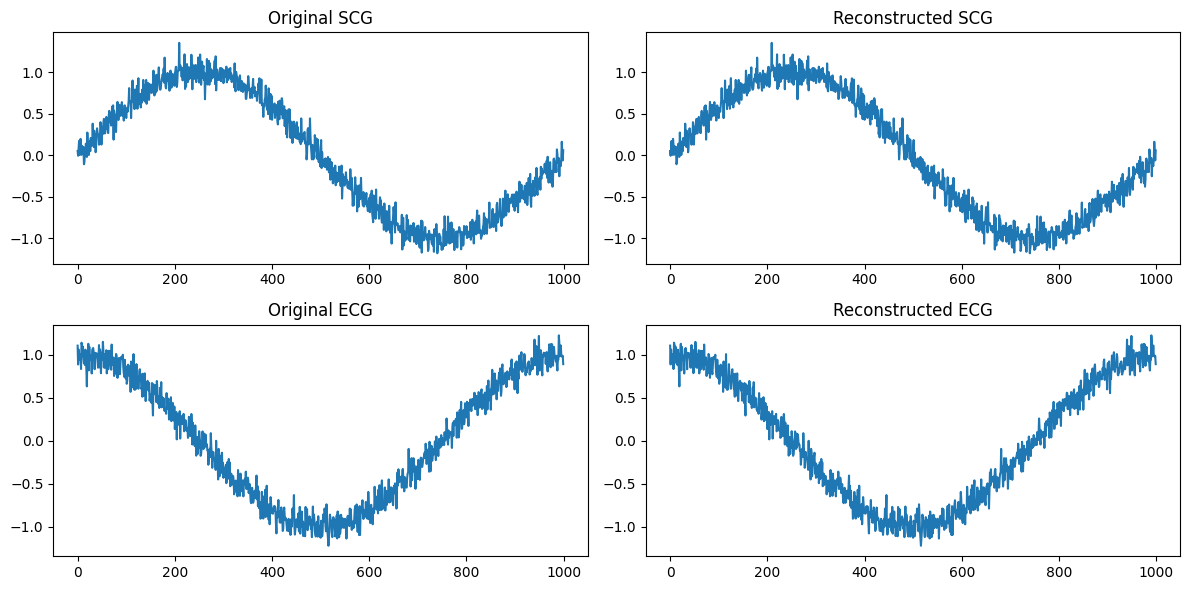

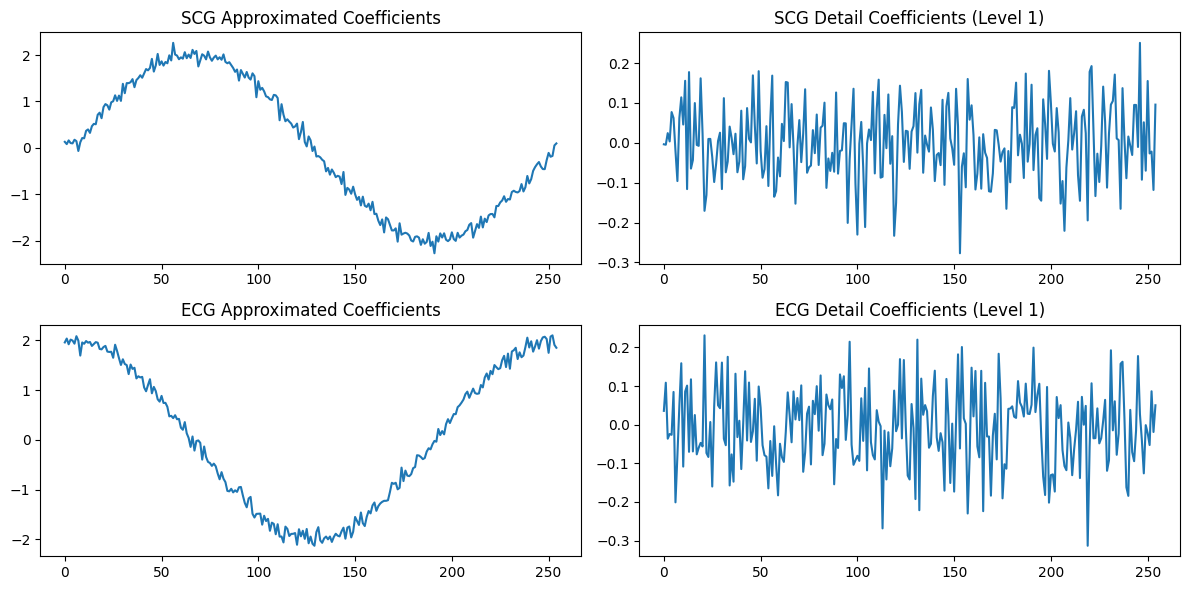

In [ ]:

import numpy as np
import pywt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic SCG and ECG data
def generate_data(num_samples, num_features, noise=0.1):
    scg = np.sin(np.linspace(0, 2 * np.pi, num_features)) + noise * np.random.randn(num_samples, num_features)
    ecg = np.cos(np.linspace(0, 2 * np.pi, num_features)) + noise * np.random.randn(num_samples, num_features)
    return scg, ecg

# Define the wavelet type and decomposition level
wavelet_type = 'db4'
decomposition_level = 2

# Set random seed for reproducibility
np.random.seed(42)
num_samples = 100
num_features = 1000
scg, ecg = generate_data(num_samples, num_features)

# Perform DWT on the SCG and ECG signals
scg_coeffs = pywt.wavedec(scg, wavelet_type, level=decomposition_level, axis=1)
ecg_coeffs = pywt.wavedec(ecg, wavelet_type, level=decomposition_level, axis=1)

# Extract the approximated and detail coefficients
scg_cA = scg_coeffs[0]
scg_cD = scg_coeffs[1:]
ecg_cA = ecg_coeffs[0]
ecg_cD = ecg_coeffs[1:]

# Reconstruct the signals
scg_reconstructed = pywt.waverec(scg_coeffs, wavelet_type, axis=1)
ecg_reconstructed = pywt.waverec(ecg_coeffs, wavelet_type, axis=1)

# Denoising
# Set the detail coefficients to zero for denoising
scg_denoised_coeffs = [scg_cA] + [np.zeros_like(cD) for cD in scg_cD]
scg_denoised = pywt.waverec(scg_denoised_coeffs, wavelet_type, axis=1)

ecg_denoised_coeffs = [ecg_cA] + [np.zeros_like(cD) for cD in ecg_cD]
ecg_denoised = pywt.waverec(ecg_denoised_coeffs, wavelet_type, axis=1)

# Feature extraction
scg_features = pd.DataFrame()
scg_features['scg_cA_mean'] = scg_cA.mean(axis=1)
scg_features['scg_cA_std'] = scg_cA.std(axis=1)
for i, cD in enumerate(scg_cD):
    scg_features[f'scg_cD{i}_mean'] = cD.mean(axis=1)
    scg_features[f'scg_cD{i}_std'] = cD.std(axis=1)

ecg_features = pd.DataFrame()
ecg_features['ecg_cA_mean'] = ecg_cA.mean(axis=1)
ecg_features['ecg_cA_std'] = ecg_cA.std(axis=1)
for i, cD in enumerate(ecg_cD):
    ecg_features[f'ecg_cD{i}_mean'] = cD.mean(axis=1)
    ecg_features[f'ecg_cD{i}_std'] = cD.std(axis=1)

# Standardize the features
scaler = StandardScaler()
scg_features_scaled = scaler.fit_transform(scg_features)
ecg_features_scaled = scaler.fit_transform(ecg_features)

# Visualization
# Visualize the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(scg[0])
plt.title('Original SCG')
plt.subplot(2, 2, 2)
plt.plot(scg_reconstructed[0])
plt.title('Reconstructed SCG')
plt.subplot(2, 2, 3)
plt.plot(ecg[0])
plt.title('Original ECG')
plt.subplot(2, 2, 4)
plt.plot(ecg_reconstructed[0])
plt.title('Reconstructed ECG')
plt.tight_layout()
plt.show()

# Visualize the approximated and detail coefficients
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(scg_cA[0])
plt.title('SCG Approximated Coefficients')
plt.subplot(2, 2, 2)
plt.plot(scg_cD[0][0])
plt.title('SCG Detail Coefficients (Level 1)')
plt.subplot(2, 2, 3)
plt.plot(ecg_cA[0])
plt.title('ECG Approximated Coefficients')
plt.subplot(2, 2, 4)
plt.plot(ecg_cD[0][0])
plt.title('ECG Detail Coefficients (Level 1)')
plt.tight_layout()
plt.show()


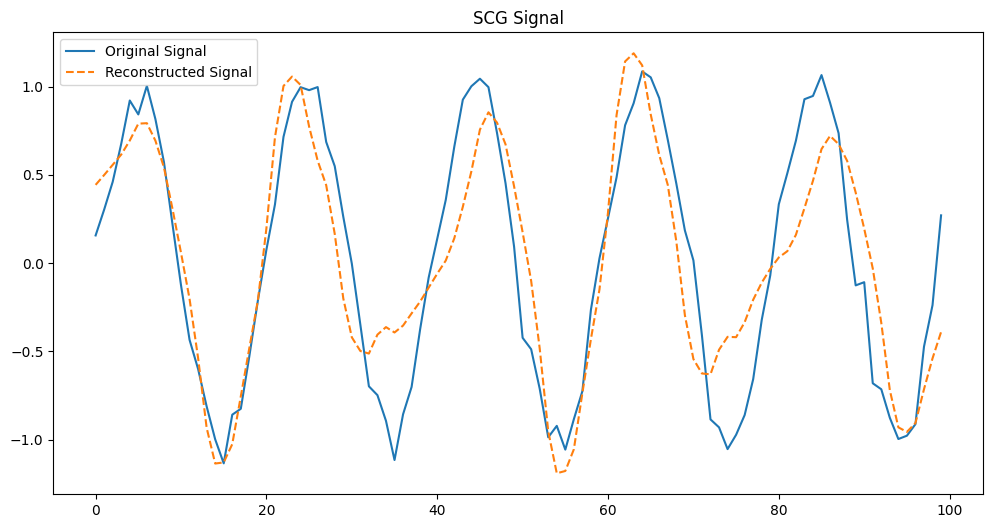

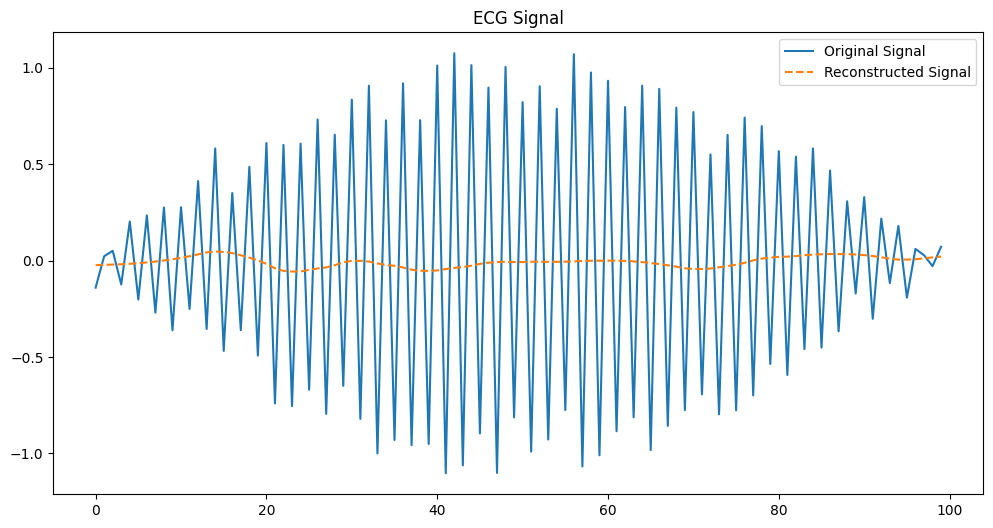

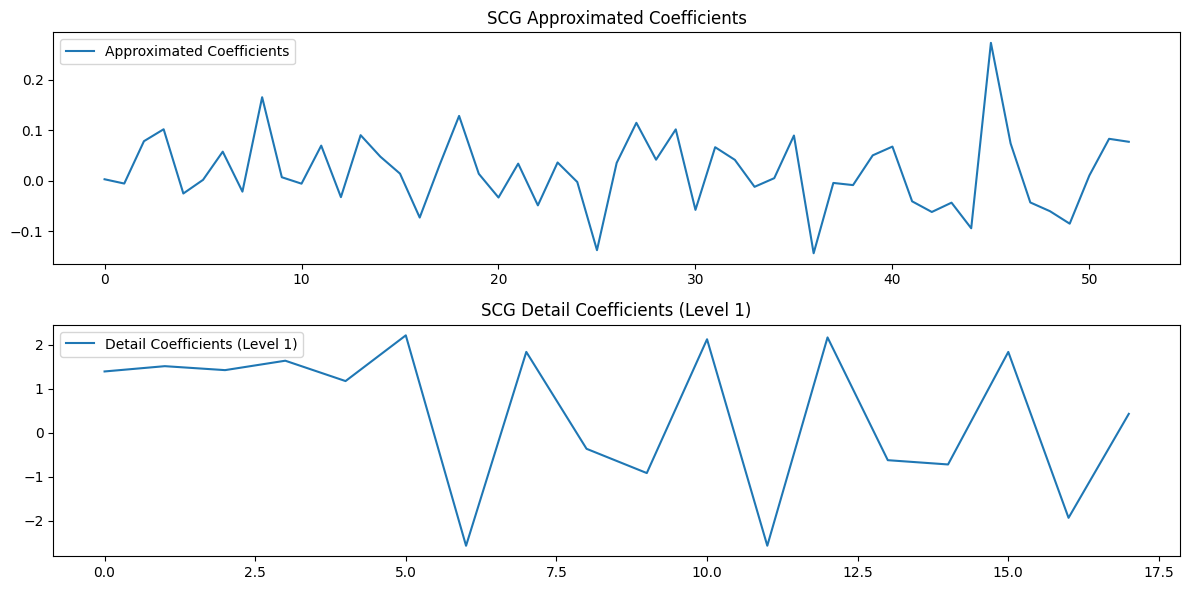

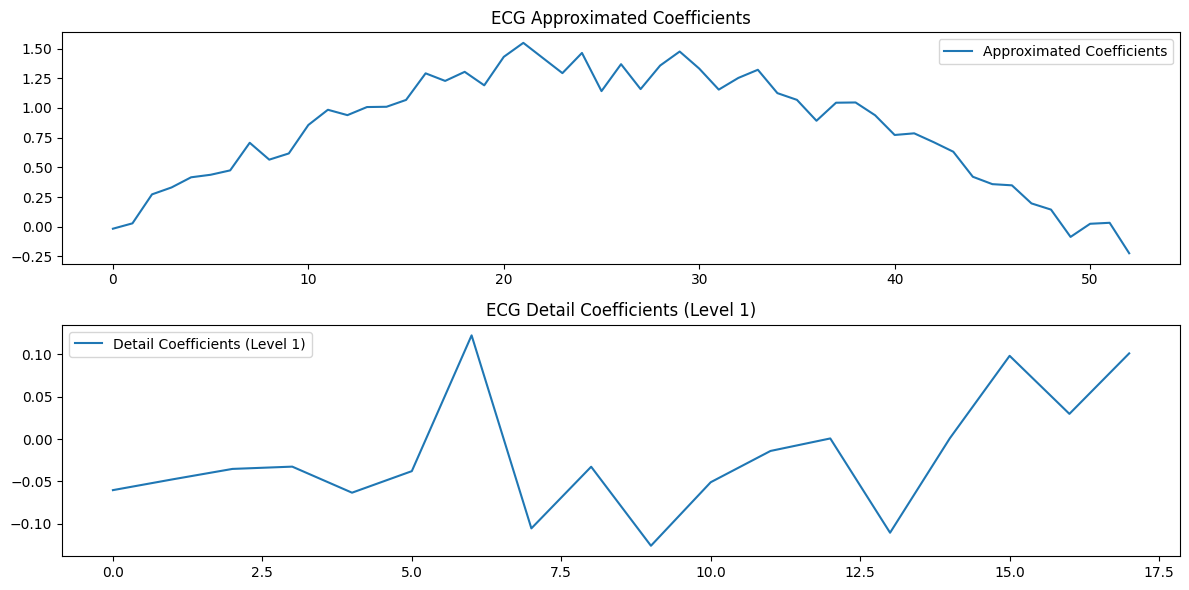

In [ ]:
import numpy as np
import pywt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic SCG and ECG data
def generate_data(num_samples, num_features, noise=0.1):
    time = np.linspace(0, 1, num_features)
    scg = np.sin(2 * np.pi * 5 * time) + noise * np.random.randn(num_samples, num_features)
    ecg = np.sin(2 * np.pi * 50 * time) + noise * np.random.randn(num_samples, num_features)
    return scg, ecg

# Denoising using wavelet transform with thresholding
def denoise_signal(signal, wavelet, level):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    threshold = np.sqrt(2 * np.log(len(signal)))

    def soft_thresholding(coeffs, threshold):
        return np.sign(coeffs) * np.maximum(np.abs(coeffs) - threshold, 0)

    denoised_coeffs = [coeffs[0]]  # Keep the approximation coefficients
    denoised_coeffs += [soft_thresholding(c, threshold) for c in coeffs[1:]]

    denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
    return denoised_signal

# Feature extraction from wavelet coefficients
def extract_features(coeffs):
    features = {}
    features['cA_mean'] = coeffs[-1].mean()
    features['cA_std'] = coeffs[-1].std()
    for i, cD in enumerate(coeffs[:-1]):
        features[f'cD{i}_mean'] = cD.mean()
        features[f'cD{i}_std'] = cD.std()
    return features

# Main processing function
def process_signals(scg, ecg, wavelet, level):
    scg_coeffs = [pywt.wavedec(sig, wavelet, level=level) for sig in scg]
    ecg_coeffs = [pywt.wavedec(sig, wavelet, level=level) for sig in ecg]

    scg_features = pd.DataFrame([extract_features(coeffs) for coeffs in scg_coeffs])
    ecg_features = pd.DataFrame([extract_features(coeffs) for coeffs in ecg_coeffs])

    scaler = StandardScaler()
    scg_features_scaled = scaler.fit_transform(scg_features)
    ecg_features_scaled = scaler.fit_transform(ecg_features)

    return scg_coeffs, ecg_coeffs, scg_features_scaled, ecg_features_scaled

# Visualization function
def visualize_signals(original, reconstructed, title):
    plt.figure(figsize=(12, 6))
    plt.plot(original, label='Original Signal')
    plt.plot(reconstructed, label='Reconstructed Signal', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualization function for coefficients
def visualize_coefficients(coeffs, title_prefix):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(coeffs[-1], label='Approximated Coefficients')
    plt.title(f'{title_prefix} Approximated Coefficients')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(coeffs[0], label='Detail Coefficients (Level 1)')
    plt.title(f'{title_prefix} Detail Coefficients (Level 1)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Set parameters
wavelet_type = 'db4'
decomposition_level = 3
num_samples = 1000
num_features = 100

# Generate data
scg, ecg = generate_data(num_samples, num_features)

# Process signals
scg_coeffs, ecg_coeffs, scg_features_scaled, ecg_features_scaled = process_signals(scg, ecg, wavelet_type, decomposition_level)

# Denoise signals
scg_denoised = np.array([denoise_signal(sig, wavelet_type, decomposition_level) for sig in scg])
ecg_denoised = np.array([denoise_signal(sig, wavelet_type, decomposition_level) for sig in ecg])

# Visualize original and denoised signals
visualize_signals(scg[0], scg_denoised[0], 'SCG Signal')
visualize_signals(ecg[0], ecg_denoised[0], 'ECG Signal')

# Visualize wavelet coefficients
visualize_coefficients(scg_coeffs[0], 'SCG')
visualize_coefficients(ecg_coeffs[0], 'ECG')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Combine SCG and ECG features
features = np.hstack((scg_features_scaled, ecg_features_scaled))
labels = np.random.randint(0, 2, size=num_samples)  # Generate random binary labels for demonstration

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a simple decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.49


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 9, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best accuracy: {grid_search.best_score_:.2f}')


Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best accuracy: 0.53


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5103 - loss: 0.6961
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5291 - loss: 0.6854 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 0.6835 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5714 - loss: 0.6781 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - loss: 0.6702 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5770 - loss: 0.6700
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6410 - loss: 0.6587
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6210 - loss: 0.6511
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 0.6407
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6359 - loss: 0.6412
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5082 - loss: 0.7252
CNN Accuracy: 0.55


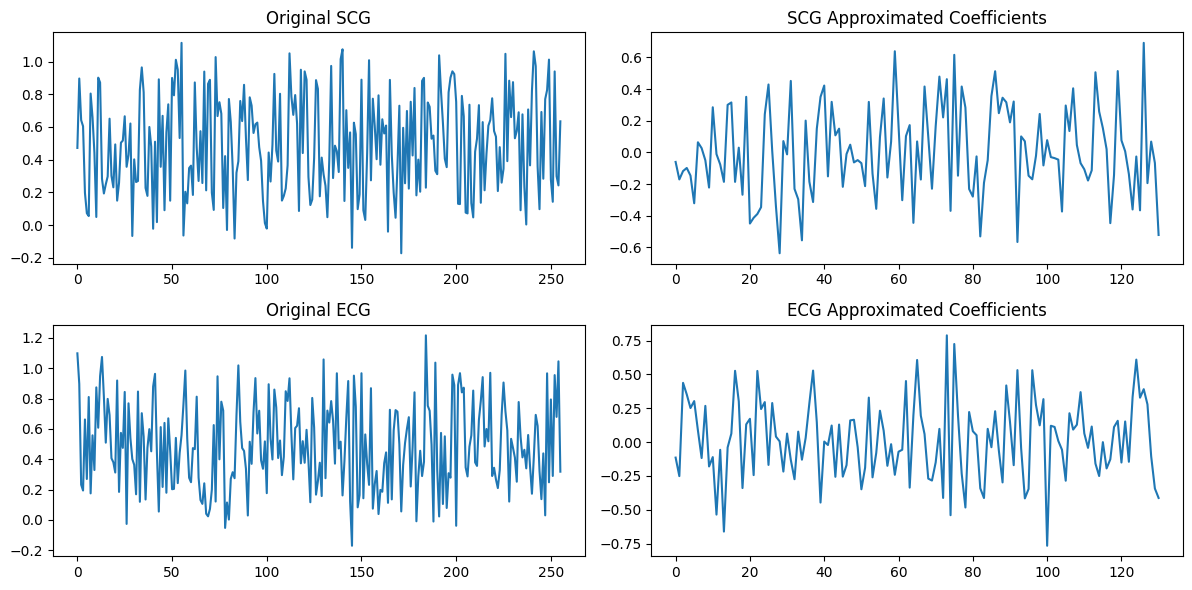

In [ ]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Function to generate synthetic SCG and ECG data
def generate_data(num_samples, num_features, noise=0.1):
    np.random.seed(42)
    scg = np.random.rand(num_samples, num_features) + noise * np.random.randn(num_samples, num_features)
    ecg = np.random.rand(num_samples, num_features) + noise * np.random.randn(num_samples, num_features)
    return scg, ecg

# Define the wavelet type and decomposition level
wavelet_type = 'db4'
decomposition_level = 2

# Generate synthetic data
num_samples = 1000  # Adjust the number of samples as needed
num_features = 256  # Adjust the number of features as needed
scg, ecg = generate_data(num_samples, num_features)

# Perform DWT on the SCG and ECG signals
scg_coeffs = pywt.wavedec(scg, wavelet_type, level=decomposition_level, axis=1)
ecg_coeffs = pywt.wavedec(ecg, wavelet_type, level=decomposition_level, axis=1)

# Extract the approximated and detail coefficients
scg_cA = scg_coeffs[-1]
scg_cD = scg_coeffs[:-1]
ecg_cA = ecg_coeffs[-1]
ecg_cD = ecg_coeffs[:-1]

# Compute statistical features from the coefficients
scg_features = pd.DataFrame()
scg_features['scg_cA_mean'] = scg_cA.mean(axis=1)
scg_features['scg_cA_std'] = scg_cA.std(axis=1)
for i, cD in enumerate(scg_cD):
    scg_features[f'scg_cD{i}_mean'] = cD.mean(axis=1)
    scg_features[f'scg_cD{i}_std'] = cD.std(axis=1)

ecg_features = pd.DataFrame()
ecg_features['ecg_cA_mean'] = ecg_cA.mean(axis=1)
ecg_features['ecg_cA_std'] = ecg_cA.std(axis=1)
for i, cD in enumerate(ecg_cD):
    ecg_features[f'ecg_cD{i}_mean'] = cD.mean(axis=1)
    ecg_features[f'ecg_cD{i}_std'] = cD.std(axis=1)

# Combine features into a single DataFrame
features = pd.concat([scg_features, ecg_features], axis=1)

# Define the labels (binary classification)
labels = np.random.randint(0, 2, num_samples)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN input
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f'CNN Accuracy: {accuracy:.2f}')

# Visualization (optional)
# Visualize the original and reconstructed signals (example)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(scg[0])
plt.title('Original SCG')
plt.subplot(2, 2, 2)
plt.plot(scg_cA[0])
plt.title('SCG Approximated Coefficients')
plt.subplot(2, 2, 3)
plt.plot(ecg[0])
plt.title('Original ECG')
plt.subplot(2, 2, 4)
plt.plot(ecg_cA[0])
plt.title('ECG Approximated Coefficients')
plt.tight_layout()
plt.show()


In [ ]:
# Install SHAP if not already installed
!pip install shap

import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import shap

# Function to generate synthetic SCG and ECG data
def generate_data(num_samples, num_features, noise=0.1):
    np.random.seed(42)
    scg = np.random.rand(num_samples, num_features) + noise * np.random.randn(num_samples, num_features)
    ecg = np.random.rand(num_samples, num_features) + noise * np.random.randn(num_samples, num_features)
    return scg, ecg

# Define the wavelet type and decomposition level
wavelet_type = 'db4'
decomposition_level = 3

# Generate synthetic data
num_samples = 1000  # Adjust the number of samples as needed
num_features = 256  # Adjust the number of features as needed
scg, ecg = generate_data(num_samples, num_features)

# Perform DWT on the SCG and ECG signals
scg_coeffs = pywt.wavedec(scg, wavelet_type, level=decomposition_level, axis=1)
ecg_coeffs = pywt.wavedec(ecg, wavelet_type, level=decomposition_level, axis=1)

# Extract the approximated and detail coefficients
scg_cA = scg_coeffs[-1]
scg_cD = scg_coeffs[:-1]
ecg_cA = ecg_coeffs[-1]
ecg_cD = ecg_coeffs[:-1]

# Compute statistical features from the coefficients
scg_features = pd.DataFrame()
scg_features['scg_cA_mean'] = scg_cA.mean(axis=1)
scg_features['scg_cA_std'] = scg_cA.std(axis=1)
for i, cD in enumerate(scg_cD):
    scg_features[f'scg_cD{i}_mean'] = cD.mean(axis=1)
    scg_features[f'scg_cD{i}_std'] = cD.std(axis=1)

ecg_features = pd.DataFrame()
ecg_features['ecg_cA_mean'] = ecg_cA.mean(axis=1)
ecg_features['ecg_cA_std'] = ecg_cA.std(axis=1)
for i, cD in enumerate(ecg_cD):
    ecg_features[f'ecg_cD{i}_mean'] = cD.mean(axis=1)
    ecg_features[f'ecg_cD{i}_std'] = cD.std(axis=1)

# Combine features into a single DataFrame
features = pd.concat([scg_features, ecg_features], axis=1)

# Define the labels (binary classification)
labels = np.random.randint(0, 2, num_samples)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN input
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f'CNN Accuracy: {accuracy:.2f}')

# Flatten the input data for SHAP
X_train_flat = X_train_scaled[:100]
X_test_flat = X_test_scaled[:100]

# Explain the model's predictions using SHAP
explainer = shap.KernelExplainer(model.predict, X_train_flat)
shap_values = explainer.shap_values(X_test_flat)

# Visualization
shap.summary_plot(shap_values, X_test_flat)

# Visualization (optional)
# Visualize the original and reconstructed signals (example)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(scg[0])
plt.title('Original SCG')
plt.subplot(2, 2, 2)
plt.plot(scg_cA[0])
plt.title('SCG Approximated Coefficients')
plt.subplot(2, 2, 3)
plt.plot(ecg[0])
plt.title('Original ECG')
plt.subplot(2, 2, 4)
plt.plot(ecg_cA[0])
plt.title('ECG Approximated Coefficients')
plt.tight_layout()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.2 MB/s eta 0:00:00
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4710 - loss: 0.7016
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5595 - loss: 0.6835
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5870 - loss: 0.6807
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5889 - loss: 0.6764 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6384 - loss: 0.6672 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6465 - loss: 0.6549
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6377 - loss: 0.6475
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6277 - loss: 0.6473
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6410 - loss: 0.6526
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6880 - loss: 0.6227
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4613 - loss: 0.7301  
CNN Accuracy: 0.51
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import shap

# Generate synthetic data
def generate_data(num_samples, num_features, noise=0.1):
    scg = np.random.rand(num_samples, num_features) + noise * np.random.randn(num_samples, num_features)
    ecg = np.random.rand(num_samples, num_features) + noise * np.random.randn(num_samples, num_features)
    return scg, ecg

# Feature extraction using wavelet transform
def extract_wavelet_features(signal, wavelet='db4', level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    cA, cD = coeffs[0], coeffs[1:]
    features = []
    features.append(cA.mean())
    features.append(cA.std())
    for cd in cD:
        features.append(cd.mean())
        features.append(cd.std())
    return np.array(features)

# Generate data
num_samples = 1000
num_features = 128
scg, ecg = generate_data(num_samples, num_features)

# Extract features
scg_features = np.array([extract_wavelet_features(s) for s in scg])
ecg_features = np.array([extract_wavelet_features(e) for e in ecg])

# Combine features and create labels
features = np.hstack((scg_features, ecg_features))
labels = np.random.randint(0, 2, num_samples)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN input
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build CNN model
model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f'CNN Accuracy: {accuracy:.2f}')

# Explain the model's predictions using SHAP
explainer = shap.KernelExplainer(model.predict, X_train_cnn[:100])  # Using a subset for the background data
shap_values = explainer.shap_values(X_test_cnn[:100])  # Using a subset for explanation

# Visualization
shap.summary_plot(shap_values, X_test_cnn[:100])


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5001 - loss: 0.7143 - val_accuracy: 0.4313 - val_loss: 0.6977
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5219 - loss: 0.7097 - val_accuracy: 0.4875 - val_loss: 0.6959
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4523 - loss: 0.7181 - val_accuracy: 0.5500 - val_loss: 0.6927
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5409 - loss: 0.6923 - val_accuracy: 0.5500 - val_loss: 0.6922
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5269 - loss: 0.6914 - val_accuracy: 0.5312 - val_loss: 0.6926
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5550 - loss: 0.6859 - val_accuracy: 0.5437 - val_loss: 0.6917
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4763 - loss: 0.6963 - val_accuracy: 0.4750 - val_loss: 0.6946
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4855 - loss: 0.7009 - val_accuracy: 0.4875

DimensionError: Instance must have 1 or 2 dimensions!